# Microsoft Stock Price Prediction
Windows 10 is one of the operating systems that so many people love about Microsoft. When Microsoft released Windows 10, it was announced that it would be the last version of windows and then Microsoft will only work on its updates. But now Microsoft has once again garnered a lot of attention from the world as the release of Windows 11 is just around the corner. So now will be a good time to predict Microsoft’s stock price as it is getting a lot of attention.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  pandas_profiling import ProfileReport
%matplotlib inline

In [7]:
sns.set()
plt.style.use('fivethirtyeight')
data = pd.read_csv(r"C:\Users\rishabh.naraniwal\Desktop\data\MSFT.csv")
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  05-02-2021  242.229996  243.279999  240.419998  242.199997  240.186691   
1  08-02-2021  243.149994  243.679993  240.809998  242.470001  240.454437   
2  09-02-2021  241.869995  244.759995  241.380005  243.770004  241.743637   
3  10-02-2021  245.000000  245.919998  240.889999  242.820007  240.801529   
4  11-02-2021  244.779999  245.149994  242.149994  244.490005  242.457657   

     Volume  
0  18054800  
1  22211900  
2  23565000  
3  22186700  
4  15751100  


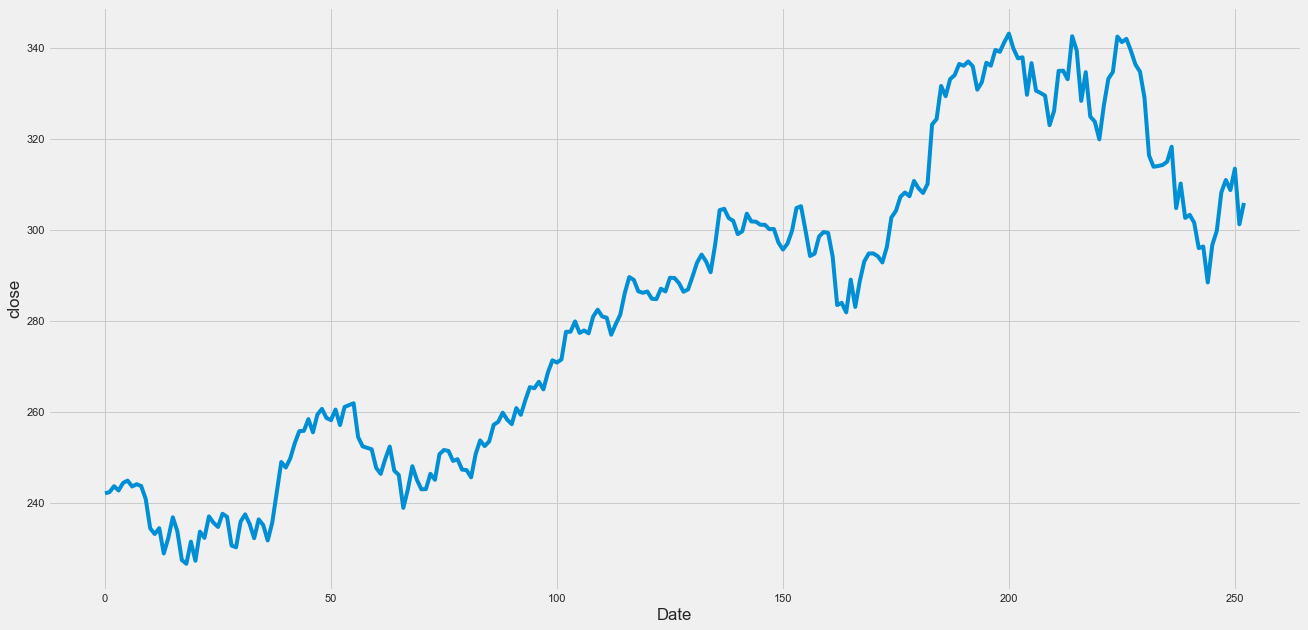

In [10]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('close')
plt.plot(data['Close'])
plt.show()

In [11]:
print(data.corr())  ##change in feature wr.t to another feature(variable) n

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998356  0.997226  0.995253   0.995378  0.036540
High       0.998356  1.000000  0.997086  0.997521   0.997736  0.053627
Low        0.997226  0.997086  1.000000  0.997675   0.997579 -0.007333
Close      0.995253  0.997521  0.997675  1.000000   0.999964  0.019427
Adj Close  0.995378  0.997736  0.997579  0.999964   1.000000  0.023395
Volume     0.036540  0.053627 -0.007333  0.019427   0.023395  1.000000


# Now let’s have a look at the correlation between the features of this dataset:

<AxesSubplot:>

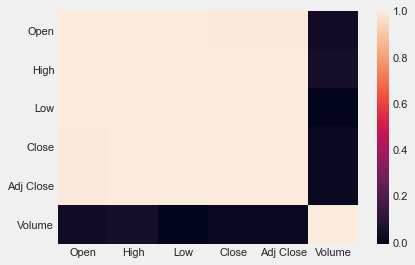

In [12]:
sns.heatmap(data.corr())

In [14]:
pf=ProfileReport(data)

In [15]:
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
y=data['Close']

In [27]:
x=data[['Open','High','Low']]

In [28]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor



In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
model=DecisionTreeRegressor()

In [33]:
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [35]:
ypred=model.predict(xtest)

In [37]:
data=pd.DataFrame(data={"predicatedrate":ypred})

In [39]:
print(data.head())

   predicatedrate
0      329.369995
1      243.080002
2      247.179993
3      330.079987
4      288.329987


[Text(0.5143423507462687, 0.9615384615384616, 'X[1] <= 280.53\nsquared_error = 1075.022\nsamples = 202\nvalue = 282.748'),
 Text(0.26297224813432835, 0.8846153846153846, 'X[1] <= 252.51\nsquared_error = 164.31\nsamples = 88\nvalue = 250.656'),
 Text(0.12243470149253731, 0.8076923076923077, 'X[2] <= 237.56\nsquared_error = 47.284\nsamples = 47\nvalue = 241.012'),
 Text(0.044309701492537316, 0.7307692307692307, 'X[1] <= 234.71\nsquared_error = 10.417\nsamples = 19\nvalue = 233.456'),
 Text(0.018656716417910446, 0.6538461538461539, 'X[2] <= 228.615\nsquared_error = 2.701\nsamples = 6\nvalue = 229.477'),
 Text(0.011194029850746268, 0.5769230769230769, 'X[1] <= 234.085\nsquared_error = 0.515\nsamples = 3\nvalue = 227.98'),
 Text(0.007462686567164179, 0.5, 'X[2] <= 227.195\nsquared_error = 0.007\nsamples = 2\nvalue = 227.475'),
 Text(0.0037313432835820895, 0.4230769230769231, 'squared_error = 0.0\nsamples = 1\nvalue = 227.39'),
 Text(0.011194029850746268, 0.4230769230769231, 'squared_error =

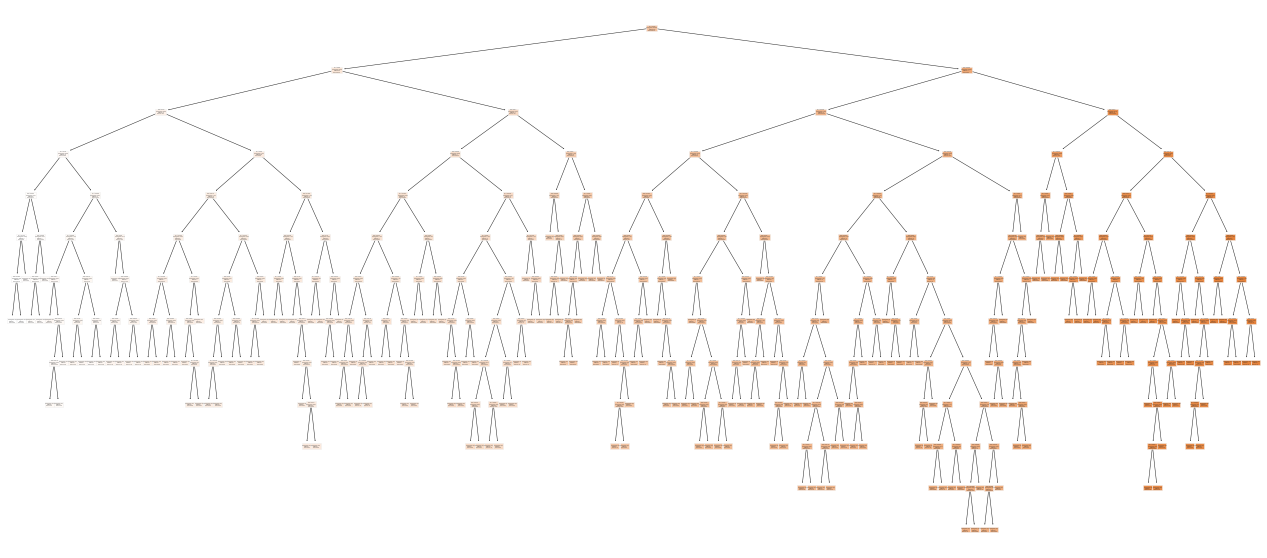

In [47]:
plt.figure(figsize=(20,10))
tree.plot_tree(model,filled=True)

In [49]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid_parm={
    "splitter":["best","random"],
    'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_depth':range(10),
    'min_samples_leaf':range(10)
}

In [58]:
grid_search=GridSearchCV(model,param_grid=grid_parm,cv=10,n_jobs=10)

In [64]:
grid_search.fit(x,y)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1520 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 235, in fit
    raise ValueError(
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

--------------------------------------------------------

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=10,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'splitter': ['best', 'random']})

In [67]:
grid_search.best_params_
print(grid_search.best_score_)

0.8231132843910182
